# Santos lyrics analyzer

Accordion(children=(Tab(children=(VBox(children=(Text(value='Eminem'), Button(description='Get discography', s…

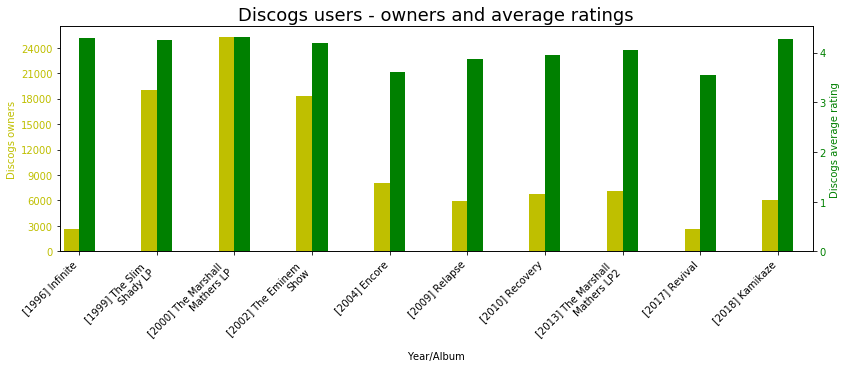

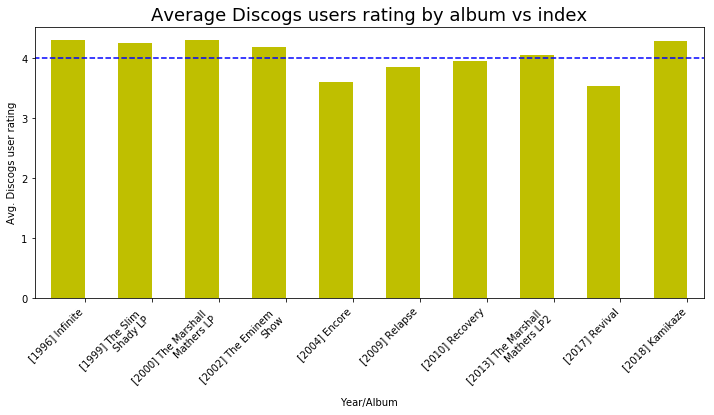

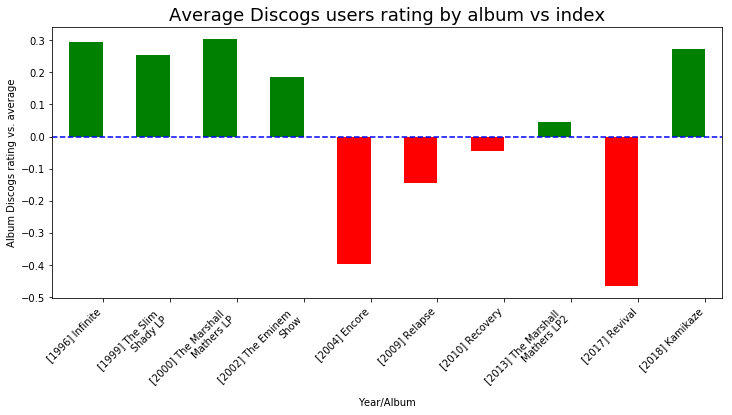

In [1]:
from functions.UI import UI
UI()

In [228]:
data2 = pd.read_csv('discog_store.csv')

In [229]:
data2 = data2[data2.ARTIST_NAME == 'Eminem']

In [230]:
data2.LYRICS_CLEAN_UNIQUE_COUNT.max()

521

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [232]:
data = pd.read_csv('discog_store.csv')

In [233]:
data.ARTIST_NAME.unique()

array(['Fontaines D.C.', 'Nirvana', 'Nick Cave & The Bad Seeds',
       'Justin Bieber', 'Eminem'], dtype=object)

In [234]:
data = data[data.ARTIST_NAME == 'Eminem']

In [235]:
data['charted_uncharted'] = data.BILLBOARD_TRACK_RANK.apply(lambda x: 'charted' if x > 0 else 'uncharted')

In [236]:
data.columns

Index(['ARTIST_ID', 'ARTIST_NAME', 'ALBUMS', 'YEAR', 'TRACK_TITLE',
       'DISCOG_PPL_HAVING', 'DISCOG_PPL_WANT', 'DISCOG_RATING',
       'DISCOG_AVG_RATING', 'EXCLUDE_ALBUM', 'EXCLUDE_SONG', 'GENIUS_LINK',
       'BILLBOARD_ALBUM_RANK', 'BILLBOARD_TRACK_RANK', 'BILLBOARD_TRACK_TITLE',
       'YEAR_ALBUM', 'YEAR_ALBUM_DISPLAY', 'LYRICS', 'SENTIMENT_PCT_NEGATIVE',
       'SENTIMENT_PCT_NEUTRAL', 'SENTIMENT_PCT_POSITIVE',
       'SENTIMENT_COMPOUND_SCORE', 'LYRICS_CLEAN', 'LYRICS_CLEAN_UNIQUE',
       'LYRICS_CLEAN_UNIQUE_COUNT', 'SENTIMENT_GROUP', 'charted_uncharted'],
      dtype='object')

In [237]:
data['SENTIMENT_GROUP'] = data.SENTIMENT_COMPOUND_SCORE.apply(
    lambda x: -1 if x <=-0.03 else (1 if x >=0.03 else 0)
)

data['SENTIMENT_GROUP_2'] = data.SENTIMENT_COMPOUND_SCORE.apply(
    lambda x: 'Negative' if x <=-0.03 else ('Positive' if x >=0.03 else 'Neutral')
)

In [238]:
data.head(2)

,ARTIST_ID,ARTIST_NAME,ALBUMS,YEAR,TRACK_TITLE,DISCOG_PPL_HAVING,DISCOG_PPL_WANT,DISCOG_RATING,DISCOG_AVG_RATING,EXCLUDE_ALBUM,...,SENTIMENT_PCT_NEGATIVE,SENTIMENT_PCT_NEUTRAL,SENTIMENT_PCT_POSITIVE,SENTIMENT_COMPOUND_SCORE,LYRICS_CLEAN,LYRICS_CLEAN_UNIQUE,LYRICS_CLEAN_UNIQUE_COUNT,SENTIMENT_GROUP,charted_uncharted,SENTIMENT_GROUP_2
606,718441,Eminem,Infinite,1996,Infinite,2700,9823,523,4.3,False,...,21.111111,65.555556,13.333333,-0.038371,aw yeah like like eminem baby back motherfucki...,"['murderin', 'disinfects', 'car', 'rather', 't...",264,-1,charted,Negative
607,718441,Eminem,Infinite,1996,Infinite [Credits],2700,9823,523,4.3,False,...,3.703704,81.481481,14.814815,0.029393,1 infinite mathers porter 2 w e g interlude 3 ...,"['grant', 'phil', 'published', 'sounds', '4822...",88,0,uncharted,Neutral


No handles with labels found to put in legend.


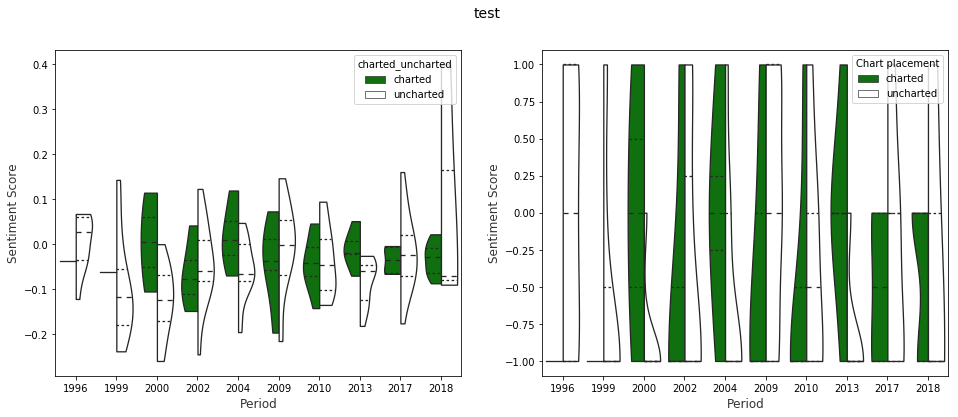

In [239]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.suptitle('test', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
sns.violinplot(x="YEAR", 
               y="SENTIMENT_COMPOUND_SCORE", 
               hue="charted_uncharted", 
               data=data, 
               split=True, 
               scale='width',
               inner="quart",
               cut = 0,
               linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax1)
ax1.set_xlabel("Period",size = 12,alpha=0.8)
ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')


sns.violinplot(x="YEAR", y="SENTIMENT_GROUP", hue="charted_uncharted", 
               data=data, split=True, scale='width', cut = 0, 
               inner="quart", linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')

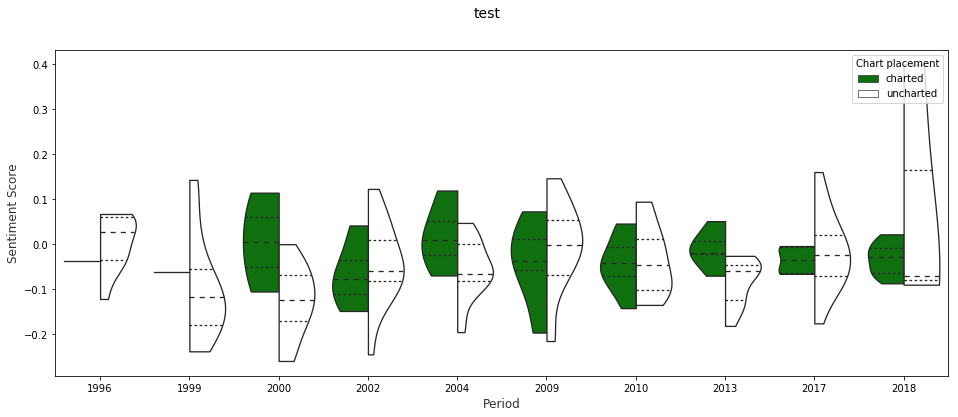

In [245]:
f, ( ax1) = plt.subplots(1, 1, figsize=(16, 6))
f.suptitle('test', fontsize=14)
x = data['YEAR']
y = data["SENTIMENT_COMPOUND_SCORE"]
sns.violinplot(x="YEAR", 
               y="SENTIMENT_COMPOUND_SCORE", 
               hue="charted_uncharted", 
               data=data, 
               split=True, 
               scale='width',
               inner="quart",
               cut = 0,
               linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax1)
# plt.fill_between(x[1:], y[1:], 0, where=y[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
# plt.fill_between(x[1:], y[1:], 0, where=y[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

ax1.set_xlabel("Period",size = 12,alpha=0.8)
ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')





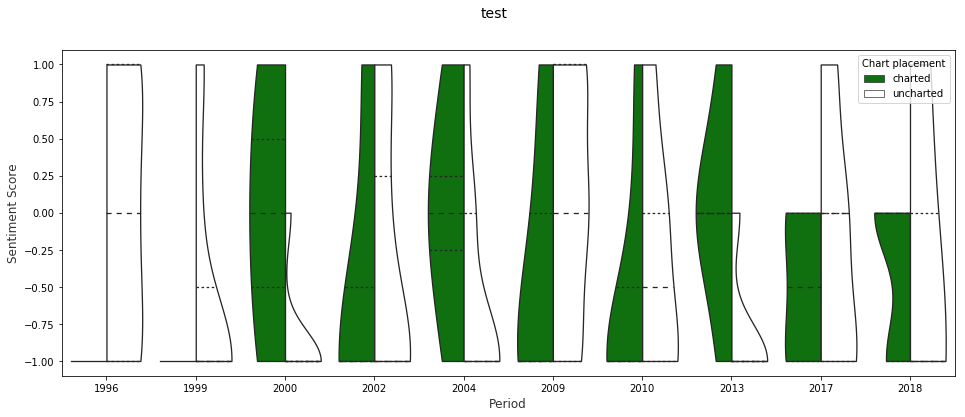

In [246]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, ( ax2) = plt.subplots(1, 1, figsize=(16, 6))
f.suptitle('test', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)



sns.violinplot(x="YEAR", y="SENTIMENT_GROUP", hue="charted_uncharted", 
               data=data, split=True, scale='width', cut = 0, 
               inner="quart", linewidth=1.3,
               palette={"charted": "green", "uncharted": "white"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Chart placement')

In [247]:
cols = ['YEAR', 'TRACK_TITLE', 'BILLBOARD_TRACK_RANK',
       'SENTIMENT_COMPOUND_SCORE', 'SENTIMENT_GROUP', 'charted_uncharted']
data = data[cols]

In [248]:
pd.pivot_table(data[data.YEAR == 200], 
               index = ['YEAR', 'charted_uncharted', 'SENTIMENT_GROUP'],
               values = 'TRACK_TITLE',
              aggfunc = 'count')

,,
YEAR,charted_uncharted,SENTIMENT_GROUP


In [249]:
data.SENTIMENT_COMPOUND_SCORE.max()

0.3991

In [250]:
data.SENTIMENT_COMPOUND_SCORE.min()

-0.2593648648648648

In [251]:
data.sort_values(by = 'SENTIMENT_COMPOUND_SCORE', ascending = False).head()

,YEAR,TRACK_TITLE,BILLBOARD_TRACK_RANK,SENTIMENT_COMPOUND_SCORE,SENTIMENT_GROUP,charted_uncharted
786,2018,Paul (Skit) by Paul Rosenberg,NaN,0.399100,1,uncharted
771,2017,Remind Me,NaN,0.160160,1,uncharted
713,2009,Dr. West (Skit) (Ft. Dominic West),NaN,0.146318,1,uncharted
624,1999,"Soap (Skit) (Ft. Jeff Bass & Royce da 5'9"")",NaN,0.142792,1,uncharted
634,1999,Paul (Skit) [1999] (Ft. Paul Rosenberg),NaN,0.135857,1,uncharted


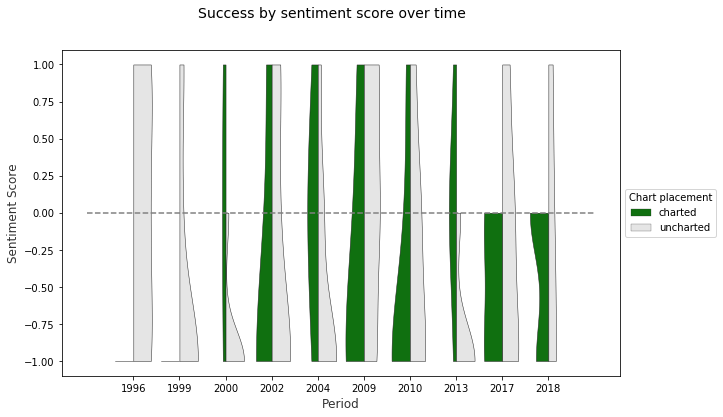

In [252]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, ( ax2) = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('Success by sentiment score over time', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)

sns.violinplot(x="YEAR", y="SENTIMENT_GROUP", hue="charted_uncharted", 
               data=data, split=True, 
               inner=None, 
               linewidth=0.5, cut = 0,
               palette={"charted": "green", "uncharted": "#e5e5e5"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
ax2.plot([-1, len(data.YEAR.unique())], [0, 0], "k--", color = 'grey')
l = plt.legend(title='Chart placement',
               loc='center left', bbox_to_anchor=(1, 0.5))


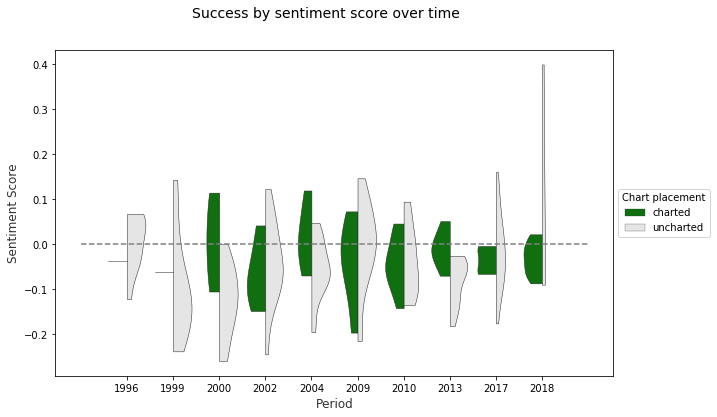

In [253]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, ( ax2) = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('Success by sentiment score over time', fontsize=14)

# sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE",
#                data=data, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Period",size = 12,alpha=0.8)
# ax1.set_ylabel("Sentiment Score",size = 12,alpha=0.8)

sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE", hue="charted_uncharted", 
               data=data, split=True, 
               inner=None, 
               linewidth=0.5, cut = 0,
               palette={"charted": "green", "uncharted": "#e5e5e5"}, ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
ax2.plot([-1, len(data.YEAR.unique())], [0, 0], "k--", color = 'grey')
l = plt.legend(title='Chart placement',
               loc='center left', bbox_to_anchor=(1, 0.5))




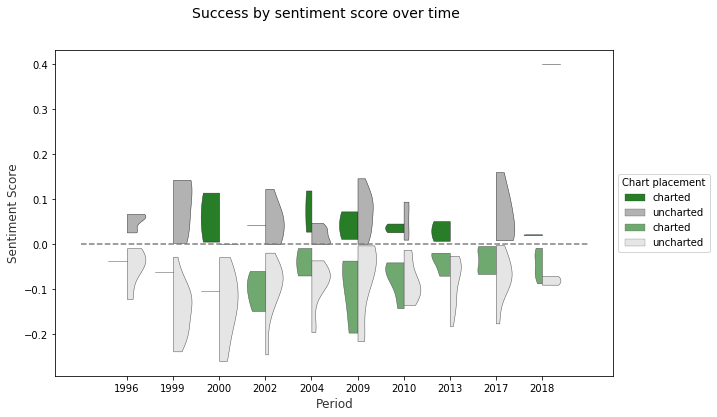

In [254]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, ( ax2) = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('Success by sentiment score over time', fontsize=14)
sns.violinplot(x="YEAR", 
               y="SENTIMENT_COMPOUND_SCORE", 
               hue="charted_uncharted", 
               hue_order = ['charted', 'uncharted'],
               data=data[data.SENTIMENT_COMPOUND_SCORE >=0], 
               split=True, 
               inner=None, 
               linewidth=0.5, 
               cut = 0,
               palette={"charted": "#198c19", "uncharted": "#b2b2b2"}, 
               ax=ax2)

sns.violinplot(x="YEAR", y="SENTIMENT_COMPOUND_SCORE", hue="charted_uncharted", 
               hue_order = ['charted', 'uncharted'],
               data=data[data.SENTIMENT_COMPOUND_SCORE <0], 
               split=True, 
               inner=None, 
               linewidth=0.5,
               cut = 0,
               palette={"charted": "#66b266", "uncharted": "#e5e5e5"}, 
               ax=ax2)
ax2.set_xlabel("Period",size = 12,alpha=0.8)
ax2.set_ylabel("Sentiment Score",size = 12,alpha=0.8)
ax2.plot([-1, len(data.YEAR.unique())], [0, 0], "k--", color = 'grey')
l = plt.legend(title='Chart placement',
               loc='center left', bbox_to_anchor=(1, 0.5))

In [255]:
data.head()

,YEAR,TRACK_TITLE,BILLBOARD_TRACK_RANK,SENTIMENT_COMPOUND_SCORE,SENTIMENT_GROUP,charted_uncharted
606,1996,Infinite,97.0,-0.038371,-1,charted
607,1996,Infinite [Credits],NaN,0.029393,0,uncharted
608,1996,Backstabber,NaN,-0.031771,-1,uncharted
609,1996,Searchin' (Ft. Angela Workman & Eye-Kyu),NaN,0.061207,1,uncharted
610,1996,Never 2 Far,NaN,-0.009018,0,uncharted


In [320]:
data['SENTIMENT_GROUP_2'] = data.SENTIMENT_COMPOUND_SCORE.apply(
    lambda x: 'Negative' if x <=-0.03 else ('Positive' if x >=0.03 else 'Neutral')
)
pd.pivot_table(data, 
               index = 'YEAR', 
               columns = ['charted_uncharted', 'SENTIMENT_GROUP_2'], 
               values = 'TRACK_TITLE', 
               aggfunc = 'count')

charted_uncharted  charted                  uncharted                 
SENTIMENT_GROUP_2 Negative Neutral Positive  Negative Neutral Positive
YEAR                                                                  
1996                   1.0     NaN      NaN       4.0     3.0      4.0
1999                   1.0     NaN      NaN      14.0     2.0      3.0
2000                   1.0     1.0      1.0      13.0     2.0      NaN
2002                   3.0     NaN      1.0       9.0     3.0      4.0
2004                   1.0     2.0      1.0      13.0     4.0      2.0
2009                   3.0     1.0      1.0       5.0     6.0      6.0
2010                   5.0     1.0      1.0       6.0     4.0      2.0
2013                   1.0     3.0      1.0       9.0     2.0      NaN
2017                   2.0     2.0      NaN       7.0     5.0      3.0
2018                   4.0     6.0      NaN       2.0     NaN      1.0

In [260]:
[x/2 *-1 for x in df['Neutral'].values.tolist()]

[-1.5, -1.0, -1.5, -1.5, -3.0, -3.5, -2.5, -2.5, -3.5, -3.0]

In [261]:
x  = df.index

In [262]:
x.min()

1996

In [263]:
-limit

-20

In [264]:
abs(min(y_ntr1) + min(y_neg))

18.5

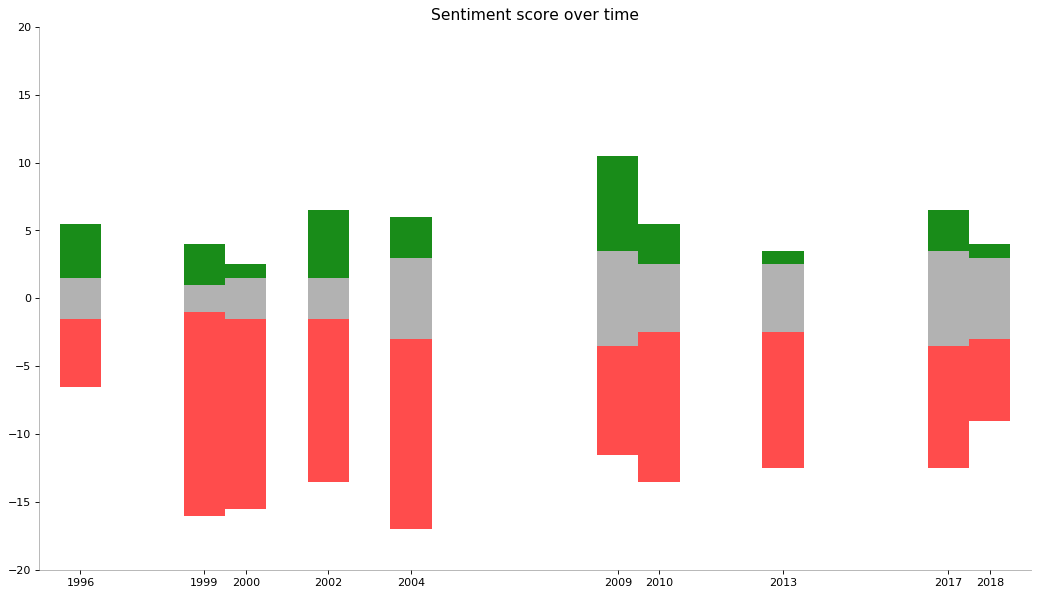

In [265]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')

# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive'] 
mycolors1 = ['tab:grey', 'tab:green']      
mycolors2 = ['tab:grey', 'tab:red']


# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

df = pd.pivot_table(data, index = 'YEAR', columns = 'SENTIMENT_GROUP_2', values = 'TRACK_TITLE', aggfunc = 'count')

# Prepare data
x  = df.index
y_neg = [x*-1 for x in df['Negative'].values.tolist()]
y_ntr1 = [x/2 *-1 for x in df['Neutral'].values.tolist()]
y_ntr2 = [x/2  for x in df['Neutral'].values.tolist()]
y_pos = df['Positive'].values.tolist()
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])


# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
# ax.stackplot(x, y_1, labels=labs, colors=mycolors1, alpha=0.7)
# ax.stackplot(x, y_2, labels=labs, colors=mycolors2, alpha=0.7)


#ax.bar(x, y_1, stacked = True, )
ax.bar(x, y_ntr2, width = 1, color = '#b2b2b2')
ax.bar(x, y_pos, width = 1 , bottom=y_ntr2, color = '#198c19')
ax.bar(x, y_ntr1, width = 1, color = '#b2b2b2')
ax.bar(x, y_neg, width = 1 , bottom=y_ntr1, color = '#ff4c4c')
#ax.fill_between(x, y1=y2, y2=0, label=columns[1], alpha=0.9, color=mycolors1[0], linewidth=2)
#ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=0.9, color=mycolors[1], linewidth=2)

# Decorations
ax.set_title('Sentiment score over time', fontsize=14)

#calculate and set limits
max_value = max(max(y_ntr1) + max(y_pos), abs(min(y_ntr1) + min(y_neg)))
limit = round(max_value *1.1)
limit
ax.set(ylim=[-limit, limit])
# ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::1], fontsize=10, horizontalalignment='center')
# plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0]-1, x[-1]+1)
# for y in np.arange(5, max(y2), 5):    
#     plt.hlines(y, xmin=x.min(), xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


plt.show()

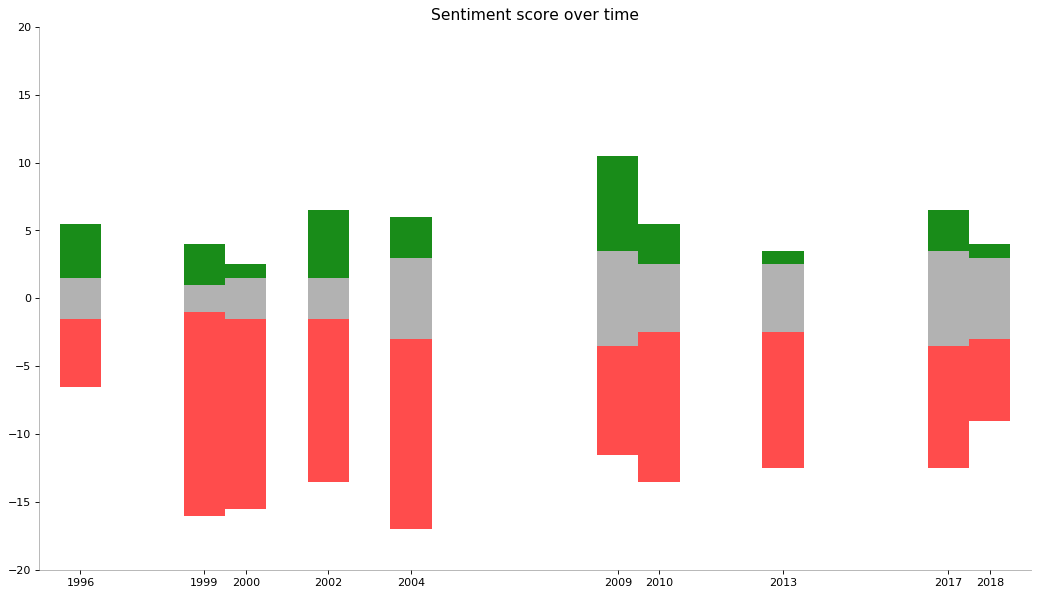

In [266]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')

# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive'] 
mycolors1 = ['tab:grey', 'tab:green']      
mycolors2 = ['tab:grey', 'tab:red']


# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

df = pd.pivot_table(data, index = 'YEAR', columns = 'SENTIMENT_GROUP_2', values = 'TRACK_TITLE', aggfunc = 'count')

# Prepare data
x  = df.index
y_neg = [x*-1 for x in df['Negative'].values.tolist()]
y_ntr1 = [x/2 *-1 for x in df['Neutral'].values.tolist()]
y_ntr2 = [x/2  for x in df['Neutral'].values.tolist()]
y_pos = df['Positive'].values.tolist()
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])


# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
# ax.stackplot(x, y_1, labels=labs, colors=mycolors1, alpha=0.7)
# ax.stackplot(x, y_2, labels=labs, colors=mycolors2, alpha=0.7)


#ax.bar(x, y_1, stacked = True, )
ax.bar(x, y_ntr2, width = 1, color = '#b2b2b2')
ax.bar(x, y_pos, width = 1 , bottom=y_ntr2, color = '#198c19')
ax.bar(x, y_ntr1, width = 1, color = '#b2b2b2')
ax.bar(x, y_neg, width = 1 , bottom=y_ntr1, color = '#ff4c4c')
#ax.fill_between(x, y1=y2, y2=0, label=columns[1], alpha=0.9, color=mycolors1[0], linewidth=2)
#ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=0.9, color=mycolors[1], linewidth=2)

# Decorations
ax.set_title('Sentiment score over time', fontsize=14)

#calculate and set limits
max_value = max(max(y_ntr1) + max(y_pos), abs(min(y_ntr1) + min(y_neg)))
limit = round(max_value *1.1)
limit
ax.set(ylim=[-limit, limit])
# ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::1], fontsize=10, horizontalalignment='center')
# plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0]-1, x[-1]+1)
# for y in np.arange(5, max(y2), 5):    
#     plt.hlines(y, xmin=x.min(), xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


plt.show()

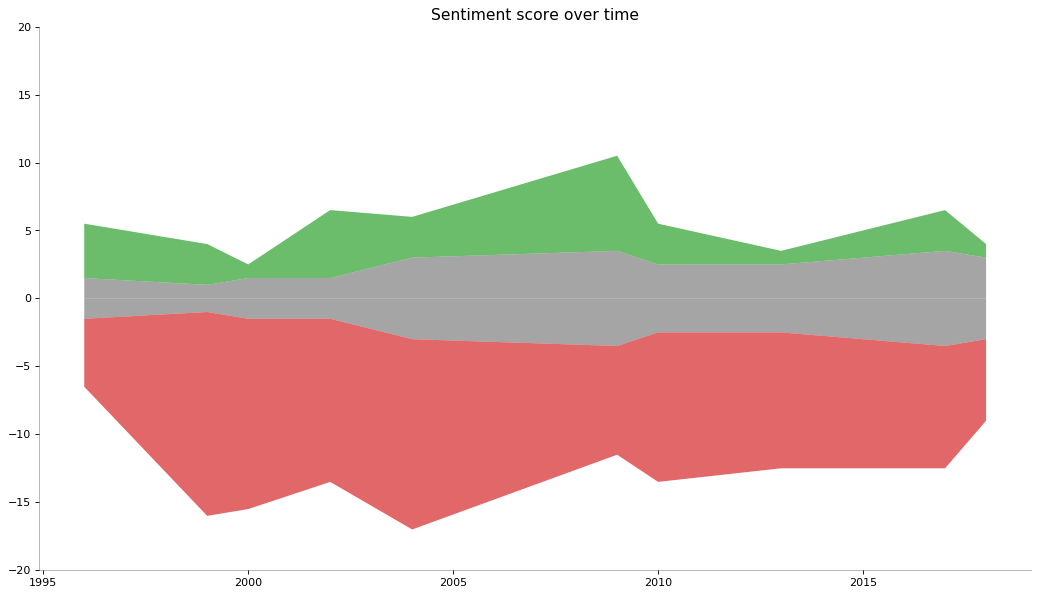

In [267]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')

# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive'] 
mycolors1 = ['tab:grey', 'tab:green']      
mycolors2 = ['tab:grey', 'tab:red']


# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

df = pd.pivot_table(data, index = 'YEAR', columns = 'SENTIMENT_GROUP_2', values = 'TRACK_TITLE', aggfunc = 'count')

# Prepare data
x  = df.index
y_neg = [x*-1 for x in df['Negative'].values.tolist()]
y_ntr1 = [x/2 *-1 for x in df['Neutral'].values.tolist()]
y_ntr2 = [x/2  for x in df['Neutral'].values.tolist()]
y_pos = df['Positive'].values.tolist()
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])


# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y_1, labels=labs, colors=mycolors1, alpha=0.7)
ax.stackplot(x, y_2, labels=labs, colors=mycolors2, alpha=0.7)



# Decorations
ax.set_title('Sentiment score over time', fontsize=14)

#calculate and set limits
max_value = max(max(y_ntr1) + max(y_pos), abs(min(y_ntr1) + min(y_neg)))
limit = round(max_value *1.1)
limit
ax.set(ylim=[-limit, limit])
# ax.legend(fontsize=10, ncol=4)
# plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
# plt.xlim(x[0], x[-1])
# for y in np.arange(5, max(y2), 5):    
#     plt.hlines(y, xmin=x.min(), xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


plt.show()

In [293]:
min(y_neg) + min(y_ntr1)

-17.0

In [294]:
max(y_pos) + max(y_ntr2)

9.0

In [307]:
import math
mylist = [0 if math.isnan(x) else x for x in mylist]

NameError: name 'mylist' is not defined

In [313]:
df_charted = pd.pivot_table(data[data.charted_uncharted == 'charted'],
                            index = 'YEAR', 
                            columns = 'SENTIMENT_GROUP_2', 
                            values = 'TRACK_TITLE', 
                            aggfunc = 'count')
x  = df_charted.index
y_neg = [0 if math.isnan(x) else x for x in [x*-1 for x in df_charted['Negative'].values.tolist()]]
y_ntr1 = [0 if math.isnan(x) else x for x in [x/2 *-1 for x in df_charted['Neutral'].values.tolist()]]
y_ntr2 = [0 if math.isnan(x) else x for x in [x/2  for x in df_charted['Neutral'].values.tolist()]]
y_pos = [0 if math.isnan(x) else x for x in df_charted['Positive'].values.tolist()]
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])

xlimit_1 = [df_charted.index.min()-1, df_charted.index.max()+1]
ylimit_1 = round(max(max(y_pos) + max(y_ntr2), abs(min(y_neg) + min(y_ntr1))) *1.1)

In [315]:
xlimit_1

[1995, 2019]

In [310]:
y_ntr1

[0, 0, -0.5, 0, -1.0, -0.5, -0.5, -1.5, -1.0, -3.0]

In [311]:
data

list

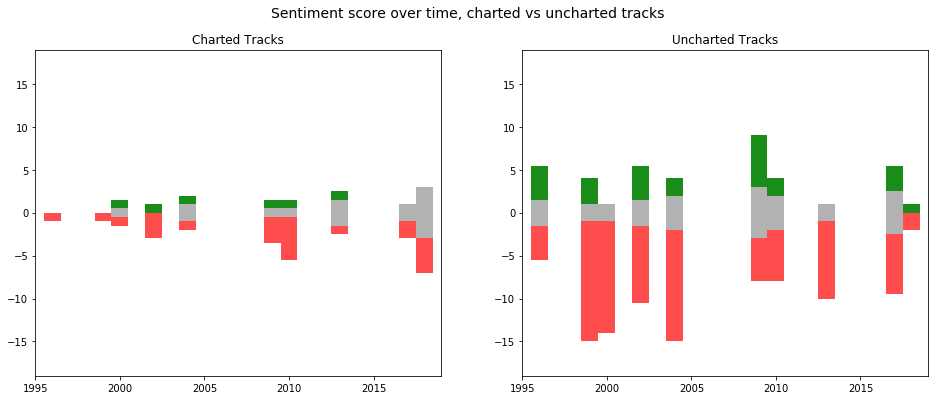

In [319]:
mycolors1 = ['tab:grey', 'tab:green']      
mycolors2 = ['tab:grey', 'tab:red']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.suptitle('Sentiment score over time, charted vs uncharted tracks', fontsize=14)

columns = df.columns[1:]
labs = columns.values.tolist()

# charted
df = pd.pivot_table(data[data.charted_uncharted == 'charted'],
                            index = 'YEAR', 
                            columns = 'SENTIMENT_GROUP_2', 
                            values = 'TRACK_TITLE', 
                            aggfunc = 'count')
x  = df.index
y_neg = [0 if math.isnan(x) else x for x in [x*-1 for x in df['Negative'].values.tolist()]]
y_ntr1 = [0 if math.isnan(x) else x for x in [x/2 *-1 for x in df['Neutral'].values.tolist()]]
y_ntr2 = [0 if math.isnan(x) else x for x in [x/2  for x in df['Neutral'].values.tolist()]]
y_pos = [0 if math.isnan(x) else x for x in df['Positive'].values.tolist()]
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])
# plot bars
ax1.bar(x, y_ntr2, width = 1, color = '#b2b2b2')
ax1.bar(x, y_pos, width = 1 , bottom=y_ntr2, color = '#198c19')
ax1.bar(x, y_ntr1, width = 1, color = '#b2b2b2')
ax1.bar(x, y_neg, width = 1 , bottom=y_ntr1, color = '#ff4c4c')
# calculate axis limits
xlimit_1 = [df_charted.index.min()-1, df_charted.index.max()+1]
ylimit_1 = round(max(max(y_pos) + max(y_ntr2), abs(min(y_neg) + min(y_ntr1))) *1.1)
# set title
ax1.title.set_text('Charted Tracks')



# uncharted
df = pd.pivot_table(data[data.charted_uncharted == 'uncharted'],
                            index = 'YEAR', 
                            columns = 'SENTIMENT_GROUP_2', 
                            values = 'TRACK_TITLE', 
                            aggfunc = 'count')
x  = df.index
y_neg = [0 if math.isnan(x) else x for x in [x*-1 for x in df['Negative'].values.tolist()]]
y_ntr1 = [0 if math.isnan(x) else x for x in [x/2 *-1 for x in df['Neutral'].values.tolist()]]
y_ntr2 = [0 if math.isnan(x) else x for x in [x/2  for x in df['Neutral'].values.tolist()]]
y_pos = [0 if math.isnan(x) else x for x in df['Positive'].values.tolist()]
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])
# plot bars
ax2.bar(x, y_ntr2, width = 1, color = '#b2b2b2')
ax2.bar(x, y_pos, width = 1 , bottom=y_ntr2, color = '#198c19')
ax2.bar(x, y_ntr1, width = 1, color = '#b2b2b2')
ax2.bar(x, y_neg, width = 1 , bottom=y_ntr1, color = '#ff4c4c')
# calculate axis limits
xlimit_2 = [df_uncharted.index.min()-1, df_uncharted.index.max()+1]
ylimit_2 = round(max(max(y_pos) + max(y_ntr2), abs(min(y_neg) + min(y_ntr1))) *1.1)
# set title
ax2.title.set_text('Uncharted Tracks')


# set final limtits for both subplots
xlimit_final = [min(xlimit_1[0], xlimit_2[0]), max(xlimit_1[1], xlimit_2[1])]
ylimit_final = max(ylimit_1, ylimit_2)
ax1.set(ylim=[-ylimit_final, ylimit_final], xlim=xlimit_final)
ax2.set(ylim=[-ylimit_final, ylimit_final], xlim=xlimit_final)




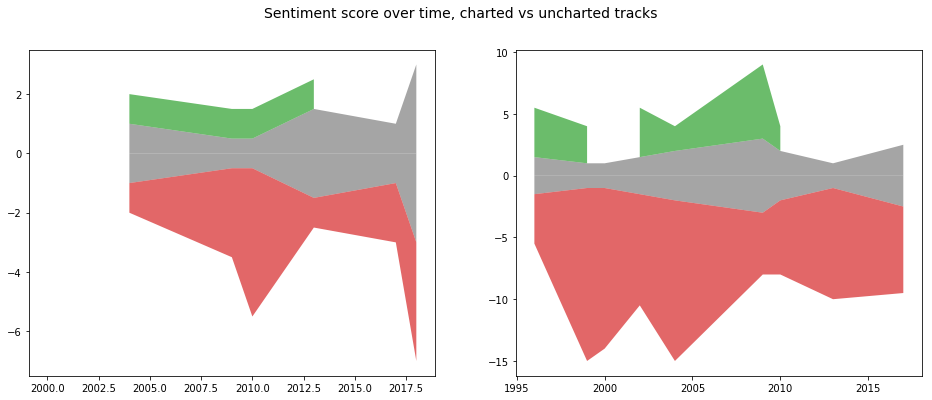

In [283]:
mycolors1 = ['tab:grey', 'tab:green']      
mycolors2 = ['tab:grey', 'tab:red']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.suptitle('Sentiment score over time, charted vs uncharted tracks', fontsize=14)

# charted
df_charted = pd.pivot_table(data[data.charted_uncharted == 'charted'],
                            index = 'YEAR', 
                            columns = 'SENTIMENT_GROUP_2', 
                            values = 'TRACK_TITLE', 
                            aggfunc = 'count')
# columns = df_charted.columns[1:]
# labs = columns.values.tolist()

# Prepare data
x  = df_charted.index
y_neg = [x*-1 for x in df_charted['Negative'].values.tolist()]
y_ntr1 = [x/2 *-1 for x in df_charted['Neutral'].values.tolist()]
y_ntr2 = [x/2  for x in df_charted['Neutral'].values.tolist()]
y_pos = df_charted['Positive'].values.tolist()
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])
ax1.stackplot(x, y_1, colors=mycolors1, alpha=0.7)
ax1.stackplot(x, y_2, colors=mycolors2, alpha=0.7)
ax1 = plt.gca()




df_uncharted = pd.pivot_table(data[data.charted_uncharted == 'uncharted'], 
                              index = 'YEAR', 
                              columns = 'SENTIMENT_GROUP_2', 
                              values = 'TRACK_TITLE', 
                              aggfunc = 'count')
x  = df_uncharted.index
y_neg = [x*-1 for x in df_uncharted['Negative'].values.tolist()]
y_ntr1 = [x/2 *-1 for x in df_uncharted['Neutral'].values.tolist()]
y_ntr2 = [x/2  for x in df_uncharted['Neutral'].values.tolist()]
y_pos = df_uncharted['Positive'].values.tolist()
y_1 = np.vstack([y_ntr2, y_pos])
y_2 = np.vstack([y_ntr1, y_neg,])
ax2.stackplot(x, y_1, colors=mycolors1, alpha=0.7)
ax2.stackplot(x, y_2, colors=mycolors2, alpha=0.7)
ax2 = plt.gca()



# # Plot for each column
# labs = columns.values.tolist()
# ax1 = plt.gca()
# ax1.stackplot(x, y_1, labels=labs, colors=mycolors1, alpha=0.7)
# ax1.stackplot(x, y_2, labels=labs, colors=mycolors2, alpha=0.7)
# # Decorations
# ax1.set_title('Sentiment score over time', fontsize=14)
# #calculate and set limits
# max_value = max(max(y_ntr1) + max(y_pos), abs(min(y_ntr1) + min(y_neg)))
# limit = round(max_value *1.1)
# limit
# ax1.set(ylim=[-limit, limit])





# # Prepare data
# x  = df_uncharted.index
# y_neg = [x*-1 for x in df_uncharted['Negative'].values.tolist()]
# y_ntr1 = [x/2 *-1 for x in df_uncharted['Neutral'].values.tolist()]
# y_ntr2 = [x/2  for x in df_uncharted['Neutral'].values.tolist()]
# y_pos = df_uncharted['Positive'].values.tolist()
# y_1 = np.vstack([y_ntr2, y_pos])
# y_2 = np.vstack([y_ntr1, y_neg,])
# # Plot for each column

# labs = columns.values.tolist()
# ax2 = plt.gca()
# ax2.stackplot(x, y_1, labels=labs, colors=mycolors1, alpha=0.7)
# ax2.stackplot(x, y_2, labels=labs, colors=mycolors2, alpha=0.7)
# # Decorations
# ax2.set_title('Sentiment score over time', fontsize=14)
# #calculate and set limits
# max_value = max(max(y_ntr1) + max(y_pos), abs(min(y_ntr1) + min(y_neg)))
# #limit = round(max_value )
# ax2.set(ylim=[-limit, limit])


plt.show()